---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Post Data Processing & Feature Selection**](#Section6)<br>
  - **6.1** [**Feature Encoding**](#Section61)<br>
  - **6.2** [**Feature Selection**](#Section62)<br>
  - **6.3** [**Data Preparation**](#Section63)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Timely customer support is essential for retaining customers across a wide array of B2C companies, and this holds true for e-commerce businesses as well. Here are key driving factors behind its importance:
    - **Customer Retention and Loyalty**: Exceptional customer service builds trust and loyalty, encouraging customers to return for future purchases 
    - **Competitive Advantage**: In a crowded market, superior customer service can be a key differentiator, attracting and retaining customers over competitors 
    - **Resolution of Issues and Concerns**: Prompt and effective customer service resolves issues swiftly, preventing negative reviews or potential churn. 
    - **Enhanced Customer Experience**: Positive interactions contribute to an overall positive shopping experience, leading to satisfied and happy customers.
    - **Reduced Cart Abandonment**: Providing assistance during the shopping process can reduce cart abandonment rates, ensuring a smoother purchase journey.
    - **Upselling and Cross-selling Opportunities**: A personalized and attentive service allows for strategic upselling or cross-selling, increasing average order value.
    - **Feedback and Improvement**: Customer service interactions offer valuable feedback, helping companies identify areas for improvement and product enhancements.
    - **Brand Reputation and Image**: Good customer service enhances brand reputation, fostering a positive image among customers and prospects.
    - **Adaptation to Customer Needs**: Understanding customer queries and concerns helps e-commerce companies adapt their offerings and services to meet evolving customer needs.
    - **Support Across Channels**: Offering customer service across multiple channels (chat, email, phone, social media) provides convenience and accessibility, catering to diverse customer preferences.

- To combat this issue, the <a href="https://conversationai.github.io/">Conversation AI team</a>, a research initiative founded by <a href="https://jigsaw.google.com/">Jigsaw</a> and Google (both a part of <a href="https://abc.xyz/">Alphabet</a>) are working on tools to help improve online conversation. One area of focus is the study of **negative online behaviors**, like **toxic comments** (i.e. comments that are rude, disrespectful or otherwise likely to make someone leave a discussion). 

<center><img width="50%" src="https://media.giphy.com/media/L0xHKWjavz9jHEwDgO/giphy.gif"></center>

- So far they have built a range of publicly available models served through the <a href = "https://perspectiveapi.com/">Perspective API</a>, including toxicity. But the current models still make errors, and they don’t allow users to select which types of toxicity they’re interested in finding (e.g. some platforms may be fine with profanity, but not with other types of toxic content) 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/working-data/proceesed_v1.pkl
/kaggle/input/processed-v2/proceesed_v2.pkl
/kaggle/input/customer-support-on-twitter/sample.csv
/kaggle/input/customer-support-on-twitter/twcs/twcs.csv


**Questions** (Ponder over each of them later...) 
- Can we predict company responses? Given the bounded set of subjects handled by each company, the answer seems yes!!! 
- Do requests get stale? How quickly do the best companies respond, compared to the worst? 
- Can we learn high quality dense embeddings or representations of similarity for topical clustering? 
- How does tone affect the support conversation? Does saying sorry help?: Ponder how I can analyze this...
- Can we help companies identify new problems, or ones most affecting their customers? 

In [3]:
# Data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
## Make an output "visualizations" directory for storing images 
# !cd /kaggle/working/
# !mkdir visualizations

In [4]:
# Fasttext language detection
!pip install fasttext-langdetect

  Preparing metadata (setup.py) ... done
  Created wheel for fasttext-langdetect: filename=fasttext_langdetect-1.0.5-py3-none-any.whl size=7503 sha256=e849353b82e9f8915c9a0ad85ab7db47857b70603173922724ee4da8fc8e2b80
  Stored in directory: /root/.cache/pip/wheels/e6/5b/5d/47e2fd5c2ff1028722739ce35f365e8f6eeb89ec97aa63e621
Successfully built fasttext-langdetect


In [5]:
!pip install contractions>0.0.18       # Resolve contractions, for instance, you're -> you are

In [6]:
!pip install ydata-profiling                                  # Library to generate basic statistics about data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 14.0.1 which is incompatible.
chex 0.1.84 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires 

In [29]:
!pip install nltk                                       # Natural Language Toolkit 
!python -m spacy download en_core_web_md                # Spacy NLP 

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_md-2.3.1/en_core_web_md-2.3.1.tar.gz#egg=en_core_web_md==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 MB 17.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_md: filename=en_core_web_md-2.3.1-py3-none-any.whl size=50916619 sha256=5c28f8cb6eb5783f5f5d17874ed99a553bf0bf94c54f786ac8ecaba77918d9bb
  Stored in directory: /root/.cache/pip/wheels/ab/d6/ea/edbabede17ef2abfca9401b2a61f567dc289cc3bb44caf9232
Successfully built en_core_web_md
  Attempting uninstall: en_core_web_md
    Found existing installation: en-core-web-md 3.7.1
    Uninstalling en-core-web-md-3.7.1:
      Successfully uninstalled e

In [27]:
!python -m spacy download en_core_web_sm

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz#egg=en_core_web_sm==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 3.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047086 sha256=4ddb737a3873bd4529969611e955ccb00917d1ebc82f9c6be37e25a15a1dda56
  Stored in directory: /root/.cache/pip/wheels/4f/1f/0e/16fae4b01d2d87454e0f484e58c48793efcf237f0894c1c4bd
Successfully built en_core_web_sm
  Attempting uninstall: en_core_web_sm
    Found existing installation: en-core-web-sm 3.7.1
    Uninstalling en-core-web-sm-3.7.1:
      Successfully uninstalled en

In [10]:
!pip install spacy_cld

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 31.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 27.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.3 MB/s eta 0:00:00
  Obtaining dependency information for srsly<1.1.0,>=1.0.2 from https://files.pythonhosted.org/packages/1a/9f/ac91eda0b61bc1cd1f12fed39aa47d7e6f9fe02d27b985181af6c4e006e2/srsly-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.2/369.2 kB 22.1 MB/s eta 0:00:00
  Created wheel for spacy_cld: filename=spacy_cld-0.1.0-py3-none-any.whl size=4047 sha256=805a2afe3c2eb0b917323fbf6d51d35141e9b8dddd2b80b64b6a9e9bb7c453e4
  Stored in directory: /root/.cache/pip/wheels/72/da/6a/61441ff0bd7bcd8c96a99a8135766e2784f82dd0ec46987cd2
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linu

In [11]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 28.4 MB/s eta 0:00:0000:0100:01


In [13]:
# pip installing the Spacy-Landetect for spaCy
!pip install spacy-langdetect

In [25]:
# Import necessary libraries
import re 
from collections import Counter 
import warnings 
warnings.filterwarnings("ignore")

# Object serialization 
import pickle
import sklearn

# WordCloud 
from wordcloud import WordCloud, STOPWORDS

# Data Visualization 
import matplotlib as mp
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Pandas pre-profiling 
from ydata_profiling import ProfileReport 

# Spelling Checker 
from spellchecker import SpellChecker 

# Import Natural Language Processing (NLP) libraries
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
from nltk import word_tokenize, sent_tokenize 
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet 

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.colors import Color


# Import Spacy for advanced natural language processing
import spacy

# Fasttext languae detection 
from ftlangdetect import detect

# Contractions 
import contractions as cm 

# Import langdetect for language detection
# Note: set seed=0 to enforce consistent results (to be done later)
# from langdetect import DetectorFactory, detect 
# from spacy_langdetect import LanguageDetector
from typing import List, Dict 

# Import scikit-learn utilities
from sklearn.preprocessing import FunctionTransformer, LabelEncoder 
from sklearn.pipeline import Pipeline, FeatureUnion  

# Import Spacy tokenizer
from spacy.tokenizer import Tokenizer 

# Import tqdm for progress bars
# Register 'pandas.progress_apply' and 'pandas.Series.map_apply' with 'tqdm' 
from tqdm import tqdm
tqdm.pandas(desc="my bar!!!")

# Chi2 test 
from scipy.stats import chi2_contingency

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [32]:
#constants
eng_stopwords = set(stopwords.words("english"))

#Spacy language model 
nlp = spacy.load("en_core_web_sm", exclude=["tok2vec", "parser", "attribute_ruler", "ner"])

#settings
warnings.filterwarnings("ignore")
lemmatizer = WordNetLemmatizer()

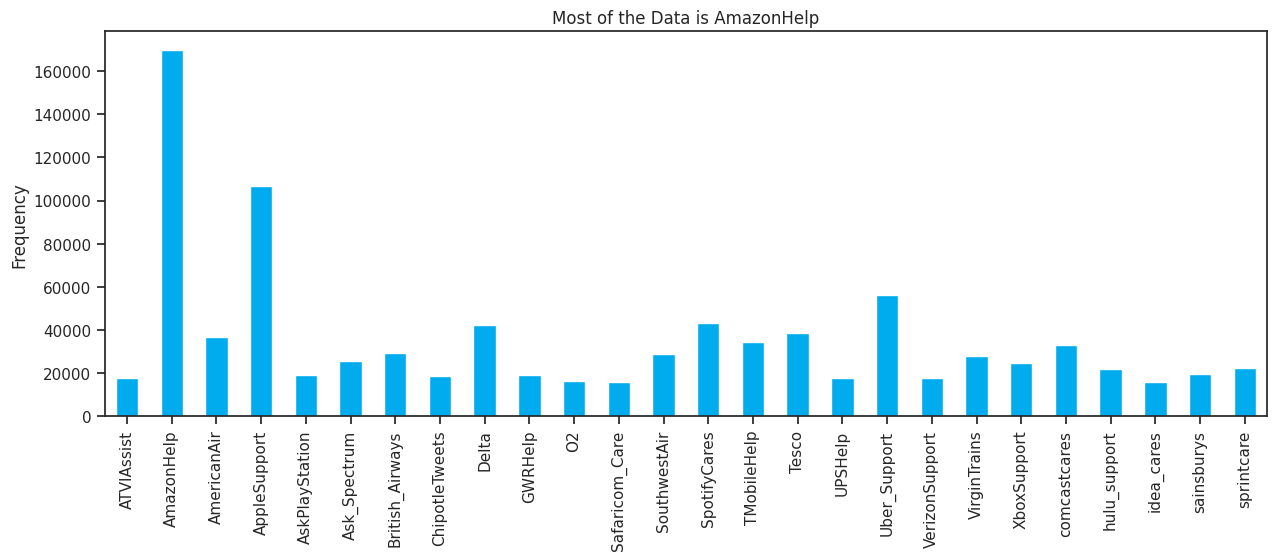

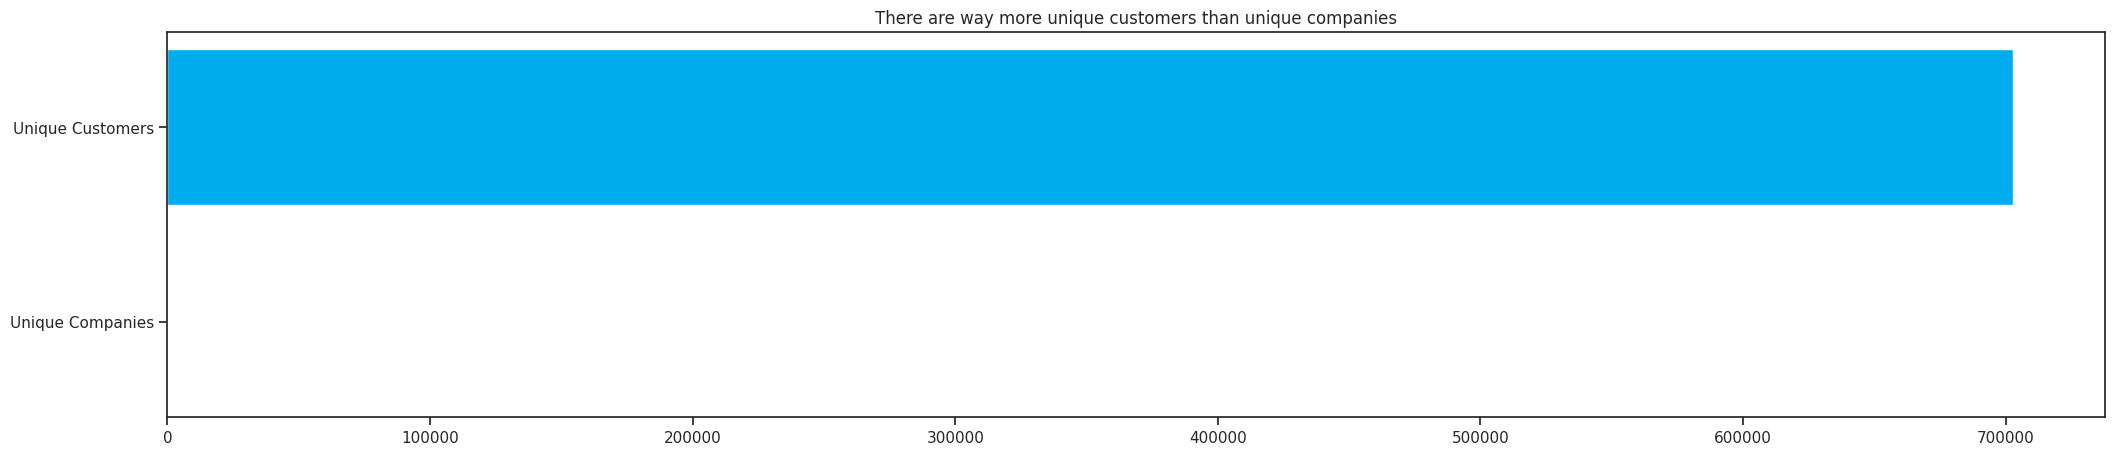

CPU times: user 17.8 s, sys: 2.41 s, total: 20.2 s
Wall time: 25.1 s


In [15]:
%%time
# Reading in all the Twitter data
all_data = pd.read_csv('/kaggle/input/customer-support-on-twitter/twcs/twcs.csv')

# Finding the distribution of all authors
count = all_data.groupby("author_id")["text"].count()

# Showing only the authors that appear more than 15000 times
c = count[count>15000].plot(kind='bar',figsize=(15, 5), color='#00acee')
c.set_xlabel('')
c.set_ylabel('Frequency')
plt.title('Most of the Data is AmazonHelp')

# Saving my plot
# plt.savefig('/kaggle/working/visualizations/authors.png')

plt.show()

# There are 108 unique authors that are companies and 702669 customers
authors_count = (len(all_data[all_data.inbound == False].author_id.unique()), len(all_data[all_data.inbound == True].author_id.unique()))

# Visualizing it
plt.figure(figsize =(25,5))
x = ['Unique Companies','Unique Customers']
ax = plt.barh(x, authors_count, color = '#00acee')
plt.title('There are way more unique customers than unique companies')
plt.show()

## Business Objectives: 
- Add here 
- Every business has one 

## Data Dictionary:
* Tweet_id: The unique ID for this tweet
* Author_id: The unique ID for this tweet author (anonymized for non-company users)
* Inbound: Whether or not the tweet was sent (inbound) to a company
* Created_at: When the tweet was created
* Text: The text content of the tweet
* Response_tweet_id: The tweet that responded to this one, if any
* In_response_to_tweet_id: The tweet this tweet was in response to, if any

In [18]:
# All data shape
print('All data has shape {}'.format(all_data.shape))

# Converting columns to the right datatypes
all_data['text'] = all_data['text'].astype('string')
all_data['author_id'] = all_data['author_id'].astype('string')

# This function utilizes Panda's Style to helps me encode data type and 
# magnitude information to my dataframe view
show = lambda x: x.tail(5).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})\
.applymap(lambda x: f"color: {'lawngreen' if isinstance(x,str) else 'cyan'}")\
.background_gradient(cmap='Blues')

show(all_data)

All data has shape (2811774, 7)


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
2811769,2987947,sprintcare,False,Wed Nov 22 08:43:51 +0000 2017,"@823869 Hey, we'd be happy to look into this for you. Please send us a Direct Message, so that we can further assist you. -TN",nan,2987948.000000
2811770,2987948,823869,True,Wed Nov 22 08:35:16 +0000 2017,@115714 wtf!? I’ve been having really shitty service all day !! Get your shit together!,2987947,nan
2811771,2812240,121673,True,Thu Nov 23 04:13:07 +0000 2017,"@143549 @sprintcare You have to go to https://t.co/v2tMHeTL7Q and ask them to add the Hulu service to your account. After you get the text, you’re good to go to https://t.co/gFyUq1kJTK",nan,2812239.000000
2811772,2987949,AldiUK,False,Wed Nov 22 08:31:24 +0000 2017,"@823870 Sounds delicious, Sarah! 😋 https://t.co/7uQPwyH1B6",nan,2987950.000000
2811773,2987950,823870,True,Tue Nov 21 22:01:04 +0000 2017,@AldiUK warm sloe gin mince pies with ice cream - the best thing ever! #notjustxmas#allyearround,"2987951,2987949",nan


## Data Wrangling 
- **Requirements**: 
    - **Inbound**: Since the first step I want to achieve is intent classification and to figure out what the customer is saying to the company, I only want data that goes from the customer to the company (inbound data).
    - **Just Amazon Customer Data**: My first modeling step is to do some sort of clustering to classify the intents for each of these tweets, doing so might be easier and more fruitful if I narrow the data to just the **amazon support data**. I can expand this later to other datasets and domains. 
    
    - {{Later, I would like my chatbot to be able to respond to make *follow up* responses to my customers.}}: Investigate this 

**Note** 
- See if I can use some **topic modeling** based **similarity matching** technique to label the intents of other 
- Any classification-based approach???

In [19]:
amazon_data = all_data[all_data["author_id"]=="AmazonHelp"]
amazon_data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
181,269,AmazonHelp,False,Wed Nov 22 09:23:01 +0000 2017,@115770 こんにちは、アマゾン公式です。Fire TV Stickが見れないというのは...,"270,271",272.0
184,273,AmazonHelp,False,Wed Nov 22 09:40:27 +0000 2017,@115770 カスタマーサービスにてお問い合わせ済みとのことで、お手数をおかけいたしました...,274,271.0
186,275,AmazonHelp,False,Wed Nov 22 10:06:26 +0000 2017,@115770 恐れ入ります。至らない点も多々あるかとは存じますが、今後ともどうぞよろしくお...,NaN,274.0
234,324,AmazonHelp,False,Wed Nov 22 09:06:00 +0000 2017,@115792 ご不便をおかけしております。アプリをご利用でしょうか。強制停止&gt;端末の...,NaN,325.0
321,615,AmazonHelp,False,Tue Oct 31 22:29:00 +0000 2017,@115820 I'm sorry we've let you down! Without ...,616,617.0


- Later, I would like my bot to make *follow-up* responses to my customers  

In [35]:
amazon_data.isnull().sum()

tweet_id                       0
author_id                      0
inbound                        0
created_at                     0
text                           0
response_tweet_id          84566
in_response_to_tweet_id      553
dtype: int64

In [36]:
amazon_data.dtypes

tweet_id                            int64
author_id                  string[python]
inbound                              bool
created_at                         object
text                       string[python]
response_tweet_id                  object
in_response_to_tweet_id           float64
dtype: object

In [37]:
amazon_data["created_at"].head()

181    Wed Nov 22 09:23:01 +0000 2017
184    Wed Nov 22 09:40:27 +0000 2017
186    Wed Nov 22 10:06:26 +0000 2017
234    Wed Nov 22 09:06:00 +0000 2017
321    Tue Oct 31 22:29:00 +0000 2017
Name: created_at, dtype: object

In [20]:
# Change the data types of "author_id" and "text" to object, and "created_at" to datetime 
amazon_data.loc[ : , ["author_id", "text"]] = amazon_data.loc[ : , ["author_id", "text"]].astype("object")
amazon_data.loc[ : , "created_at"] = pd.to_datetime(amazon_data.loc[ : , "created_at"], format="%a %b %d %H:%M:%S %z %Y")

In [21]:
amazon_data.dtypes

tweet_id                            int64
author_id                  string[python]
inbound                              bool
created_at                         object
text                       string[python]
response_tweet_id                  object
in_response_to_tweet_id           float64
dtype: object

In [22]:
# Shape of Amazon Data 
amazon_data.shape

(169840, 7)

There are 169840 rows of Amazon data, which is 6 percent of the entire data. These are all data from Amazon to a customer, I want the data from the customer to Amazon for each of these Amazon customer service responses, and this can be found in the reponse_tweet_id.

Now I drop the rows with a NaN value for the in response to tweet id column, meaning that the original customer inquiry was not available for that interaction

In [23]:
# Inspect data samples where "in_response_to_tweet_id" is null
amazon_data[amazon_data["in_response_to_tweet_id"].isnull()]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
6683,9812,AmazonHelp,False,2017-11-01 00:06:00+00:00,"@117798 Oh, no! Without providing personal/acc...",9810,NaN
9434,13165,AmazonHelp,False,2017-10-22 08:42:00+00:00,@118701 We've sent the correspondence to your ...,13164,NaN
16993,21971,AmazonHelp,False,2017-11-01 07:43:29+00:00,@120782 2/2 informação sobre outras oportunida...,21970,NaN
17186,22173,AmazonHelp,False,2017-11-01 07:38:32+00:00,@120839 We're sorry for the delay with your re...,22172,NaN
19464,25264,AmazonHelp,False,2017-11-04 00:12:00+00:00,@121462 I'm sorry it hasn't arrived! We'd like...,25263,NaN
...,...,...,...,...,...,...,...
2789927,2966456,AmazonHelp,False,2017-11-29 22:57:00+00:00,@818388 ¡Hola! Sentimos los inconvenientes con...,2966455,NaN
2796241,2972799,AmazonHelp,False,2017-11-30 01:50:52+00:00,@571014 One day delivery is only free if you m...,2972798,NaN
2803260,2979652,AmazonHelp,False,2017-11-30 03:49:00+00:00,"@131812 I get you being disappointed, Rajath. ...",2979651,NaN
2804651,2980946,AmazonHelp,False,2017-11-28 05:41:35+00:00,@822178 Exchange offer depends on location and...,2980945,NaN


In [24]:
amazon_data.dropna(subset = ["in_response_to_tweet_id"], inplace = True)
amazon_data["inbound"].value_counts(), amazon_data.shape

(inbound
 False    169287
 Name: count, dtype: int64,
 (169287, 7))

**Observations** 
- The above procedure let's go of 553 rows, maybe the origin inbound requests were deleted by the poster. Since I am interested in atleast single-level request response from the company, I deleted them since they won't serve me any good purpose 

In [25]:
!pwd
!mkdir objects 

/kaggle/working


In [26]:
# Converting the IDs to integers to match the tweet_id column for joining 
amazon_data["in_response_to_tweet_id"] = amazon_data["in_response_to_tweet_id"].astype("int64")

# Doing an inner join to get the respective tweets back from all_data and get the response tweets 
amazon_data = pd.merge(all_data[["tweet_id", "text"]], amazon_data, left_on="tweet_id", right_on="in_response_to_tweet_id")

# Dropping the columns that doesn't encode useful information and renaming the columns nicely for interpretability 
amazon_data.drop(["tweet_id_x", "tweet_id_y", "in_response_to_tweet_id", "inbound"], axis=1, inplace=True)

# Renaming the columns for interpretability 
amazon_data.rename(columns={"text_x": "inbound_text", "text_y": "outbound_text"}, inplace=True)

# Subsetting to inbound and outboudn text 
text = amazon_data[["inbound_text", "outbound_text"]]

# Previewing 
print(text.head())

# Saving the real, raw inbound data
text.to_pickle("/kaggle/working/objects/raw_text.pkl")

inbound = text["inbound_text"]
outbound = text["outbound_text"]

                                        inbound_text  \
0  @AmazonHelp 電話で対応してもらいましたが改良されませんでした。
保証期間も過ぎて...   
1                      @AmazonHelp こちらこそありがとうございました。   
2                           amazonのfireTVstickが見れない😢   
3                           amazonプライムビデオ、再生エラーが多いです   
4  @AmazonHelp 3 different people have given 3 di...   

                                       outbound_text  
0  @115770 カスタマーサービスにてお問い合わせ済みとのことで、お手数をおかけいたしました...  
1  @115770 恐れ入ります。至らない点も多々あるかとは存じますが、今後ともどうぞよろしくお...  
2  @115770 こんにちは、アマゾン公式です。Fire TV Stickが見れないというのは...  
3  @115792 ご不便をおかけしております。アプリをご利用でしょうか。強制停止&gt;端末の...  
4  @115820 We'd like to take a further look into ...  


In [46]:
# Showing the results of data wrangling
show(amazon_data)

,inbound_text,author_id,created_at,outbound_text,response_tweet_id
168818,Amazonで注文したDVDがまだ届かない･･･ 昨日まで到着予定なんだけど問い合わせするかなぁ･･････,AmazonHelp,2017-11-22 06:19:27+00:00,@823830 ご心配をおかけしております。ご案内しているお届け予定日を経過しても未着の場合はカスタマーサービスでお調べしますので、こちらからお問合せください。https://t.co/J6YEizFHia 出品者が発送する商品の場合は、直接出品者にお問い合わせください。SM,nan
168819,たいへん！！Amazonでピンク動画見たら請求来た！！私の消息途絶えたらAmazonに社会から消されたと思ってください。 https://t.co/SLol5IqIiO,AmazonHelp,2017-11-22 06:17:26+00:00,@823831 該当のメッセージは、https://t.co/st4oU5QbhPからお送りしたものではございません。当サイトの名をかたる架空請求詐欺が増えております。記載されている連絡先には、ご連絡なさらないようお気を付けください 。 YM,nan
168820,架空請求きたよww しかとショートメールでAmazon相談係。 https://t.co/Frn8ZegIuB,AmazonHelp,2017-11-22 07:09:54+00:00,@823853 ご承知のとおり、残念ながら悪質な詐欺が増加しているようですのでお気を付けください。 https://t.co/st4oU5QbhP を装った詐欺と思われる連絡を受け取った際はこちらをご覧ください。→ https://t.co/hY0XTcbk1X SK,nan
168821,Señores de @116928 estoy confuso sobre el público destinatario de este artículo... https://t.co/RX2bcnQ7Qa,AmazonHelp,2017-11-22 07:09:53+00:00,"@823854 ¡Hola Crispín! Lamento mucho la confusión causada. Te comento que he revisado con detalle el producto, el nombre es incorrecto, ya que funciona tanto para hombres como para mujeres. ¡Saludos! ^FQ",nan
168822,いきなり来たんだけど なんですかこれ！！？ @120465 https://t.co/4dhaXWNqB4,AmazonHelp,2017-11-22 07:49:52+00:00,@823866 当サイトからそのようなメールをお送りすることはございません。当サイトの名をかたるフィッシング行為が増えているようです。連絡先に電話をしたりしないようお気を付けください。https://t.co/k4jy2iBODo SM,nan


- Great. So now we are going to build upon this **amazon_data** from now on 
- **Since I am working with unsupervised data for the first part of my chatbot, I do not need a train-test split. My test set would also just end up needing labels as well. For this reason, I will just subset my data to the inbound/outbound data without employing the concept of unseen data.** Pay great attention to this part 

## Text Preprocessing Pipeline 
- In this process, it's expected that I will find much edge cases, and I don't have to address them all. However, in the end, I felt like my prerprocessing pipeline is relatively complete given this dataset 
- Also, this was an iterative process because I fit my models in the next notebook just to notice that my tweets still had '\u200d', '#', '', and '@' even though I still did a lot of fitting already. These are just extra emojis and extra punctuation I decided at a later stage to remove, but in the end I just modified my pipeline function 

- Before that, I did a bit of EDA with bag of words to see what words are being used by the dataset to better preprocess the data and prevent working in too much granularity. 


In [47]:
# Import Count Vectorizer 
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
# Writing a function to plot the counts that are in the data 
def top10_bag_of_words(data, output_name, title):
    """ Taking as input the data and plots the top 10 words based on counts in this text data """
    bag_of_words = CountVectorizer()
    inbound = bag_of_words.fit_transform(data)
    
    # Output will be a sparse matrix 
    word_counts = np.array(np.sum(inbound, axis=0)).reshape((-1, ))
    words = np.array(bag_of_words.get_feature_names_out())
    words_df = pd.DataFrame({"word": words, 
                             "count": word_counts})
    words_rank = words_df.sort_values(by="count", ascending=False)
    
    # Storing it in a CSV so that I can inspect it myself 
    words_rank.to_csv("words_rank.csv") # Run this for only the first time and then comment it out 
    words_rank.head()
    
    # Visualizing top 10 words 
    plt.figure(figsize=(12, 6))
    sns.barplot(x=words_rank["word"][ :10], y=words_rank["count"][ :10].astype(int), data=amazon_data, palette="inferno")
    plt.title(title)
    
    # Save the figure 
    # plt.savefig(f"/kaggle/working/visualizations/{output_name}.png")

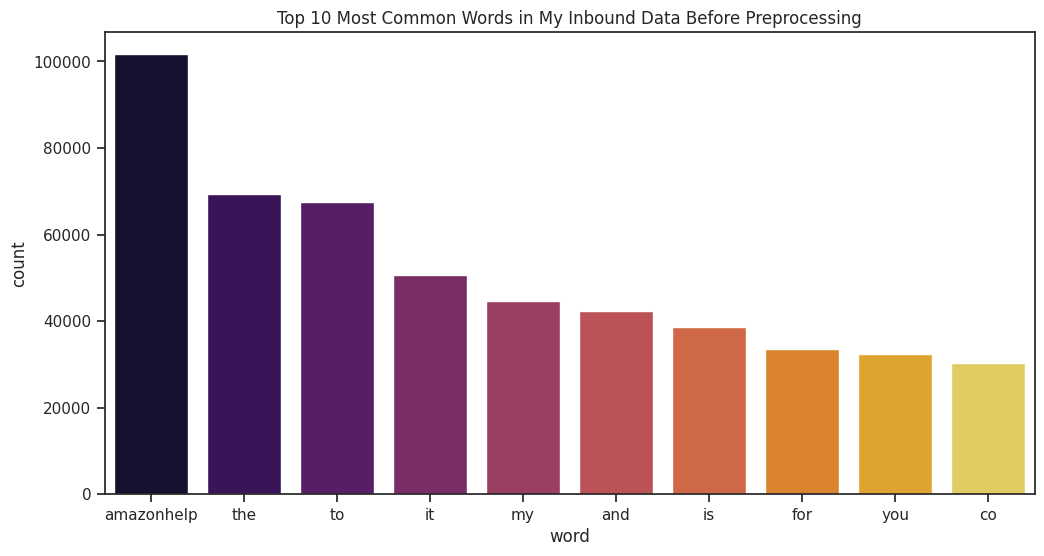

In [49]:
top10_bag_of_words(inbound, "most_common_before" , "Top 10 Most Common Words in My Inbound Data Before Preprocessing")

We see that after preprocessing, we will remove the handles which is what applesupport and 115858 is in the visualization above. For now, I briefly visualized the top 10 most common tokens to show that my data as it currently is quite dirty, they will definitely skew and ruin my results if I don't do preprocessing!

### Emoji Analysis
You can leave emojis in and have model learn embeddings for the emojis. Emoji are used in very specific instances, if they use emojis it will be in a useful sense. If the emojis are used for inside jokes, then it's different story, but that is likely not the case for this dataset because these are customer service tweets.

There's actually an embedding called emoji2vec, but that's something I can explore down the line. Right now, I think doc2vec won't be able to handle these emojis in the best way and it might skew my results if I leave them in.

Extracted from [this kernel](https://www.kaggle.com/psbots/customer-support-meets-spacy-universe)

In [ ]:
# Analysis will go here 

In [ ]:
# Emoji Visualization goes here 

## My Entire Preliminary Text Preprocessing Pipeline

I wanted all the preprocessing to be an iterative process, so I compiled it all in one function so that it runs at the same time and hence there is an enhanced sense of organization. At every preprocessing step, I visualize the lengths of each tokens of the data. In general, things like removing stop-words will shift the distribution to the left because we have fewer and fewer tokens at every preprocessing step. I also provide a peek to the head of the data at each step so that it clearly shows what processing is being done at each step.

In [27]:
# Building tokenizer goes here 
# from spacy_cld import LanguageDetector

### Variable storage
punct_base = ['?']

# Punctuations I want to remove, including the empty token
puncts = ['\u200d', '?', '....','..','...','','@','#', ',', '.', '"', ':', ')', '(', '-', '!', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '*', '+', '\\', 
    '•', '~', '£', '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', 
    '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', 
    '—', '‹', '─', '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 
    'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', 
    '¹', '≤', '‡', '√', '!','🅰','🅱']

# Using NLTK's stop words corpus
stopwords.words('english');
stop_words = set(stopwords.words('english')) 

# Found a dictionary of common contractions and colloquial language
contraction_colloq_dict = {
                           "btw": "by the way", "ain't": "is not", "aren't": "are not","can't": "cannot", 
                           "'cause": "because", "could've": "could have", "couldn't": "could not", 
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
                           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have", "i'm": "i am", 
                           "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                           "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                           "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                           "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", 
                           "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                           "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
                           "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                           "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                           "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
                           "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", 
                           "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", 
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                           "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", 
                           "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
                           "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", 
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                           "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                           "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", 
                           "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have"
}

# Initializing the lemmatizer 
# Initializing spacy objects 
# nlp_cld = spacy.load("en_core_web_md", exclude=["tagger", "ner"])
# lang_detector = spacy_cld.LanguageDetector()
# nlp_cld.add_pipe(lang_detector)

In [51]:
import contractions as cm
cm.fix("Can't you believe how it's getting harder to find a decent place to eat? I've been searching for a good restaurant that doesn't cost an arm and a leg. It's not just about the food; it's also about the ambiance, you know? I'd love to try that new place, but it's always packed! I'm thinking we should probably make a reservation in advance. Don't you think so too?")

'Cannot you believe how it is getting harder to find a decent place to eat? I have been searching for a good restaurant that does not cost an arm and a leg. It is not just about the food; it is also about the ambiance, you know? I would love to try that new place, but it is always packed! I am thinking we should probably make a reservation in advance. Do not you think so too?'

In [52]:
list("I am a boy with a big fat butt!!!")

['I',
 ' ',
 'a',
 'm',
 ' ',
 'a',
 ' ',
 'b',
 'o',
 'y',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'a',
 ' ',
 'b',
 'i',
 'g',
 ' ',
 'f',
 'a',
 't',
 ' ',
 'b',
 'u',
 't',
 't',
 '!',
 '!',
 '!']

In [39]:
nlp = spacy.load("en_core_web_sm", exclude=["tok2vec", "parser", "attribute_ruler", "ner"])

In [40]:
# My preprocessing functions (defining them here so that I could access them from anywhere in the notebook)
# Capture the hashtags and/or usertags 
# Clean comment text 

tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
### Take care of positional parameters 
def extract_hashtags(text: str) -> List[str]:
    """ Returns all Twitter hashtags from the text"""
    hashtags_ls = re.findall("#\w+", text)
    return list(set(hashtags_ls))

# Function to detect language using langdetect
## Check if I have to perform sentence level tokenization first 
def detect_language(text: str) -> str:
    """
    Detect the language of the given text using langdetect library.

    Parameters:
    - text (str): The input text for language detection.

    Returns:
    - str: The detected language code (e.g., 'en' for English).
           If language detection fails, returns 'unknown'.
    """
    try:
        # Attempt to detect the language using langdetect
        return detect(text)["lang"]
    
    except Exception:
        # Return 'unknown' if language detection fails
        return "unknown"

def clean_text(
        text, words=True, stops=True, urls=True, tags=True, hashtags = True, punctuations=True,  
        newLine=True, ellipsis=True, special_chars=True, condensed=True, non_breaking_space=True, 
        character_encodings=True, stopwords=True, only_words=True) -> str:
    
    """ Clean tweets after extracting all hashtags and username tags
    Not comprehensive enough to capture all idiosyncrasies, but works for most of the time
    """
    
    # Capture only words and no numbers
    if words:
        pattern = r"\d"
        text = re.sub(pattern, "", text)
        
    # Remove URLs 
    if urls:
        pattern = "(https\:)*\/*\/*(www\.)?(\w+)(\.\w+)\/*\w*"
        text = re.sub(pattern, "", text)
        
    # Remove tags 
    if tags:
        text = re.sub("@\S+", "", text)
        
    # Remove hashtags 
    if hashtags: 
        text = re.sub("#\w+", "", text)
        
    # Remove punctuations
    if punctuations:
        for punct in puncts: 
            text = text.replace(punct, "")
        
    # Replacing one or more occurrences of '\n' with ''
    # Replacing multiple occurrences, i.e., >=2 occurrences with '.'
    if newLine:
        text = re.sub("\n+", "", text)
        text = re.sub(r'\.\s+', '.', text)
        
    # Fix contractions
    if condensed:
        try:
            text = cm.fix(text)
        except: 
            print(text)
        
    # Remove non-breaking space 
    if non_breaking_space: 
        pattern = r"(\xa0|&nbsp)"
        text = re.sub(pattern, "", text)
        
    # Remove stopwords
    if stopwords:
        text = text.lower()
        # print(f"Original Shape of the Data is {.shape}")
        
        # Splitting with NLTK's Tweet tokenizer. This limits repeated characters to 
        # three with the reduce lens parameter and strips all the "@'s". It also splits 
        # it into 1-gram tokens         
        words = tokenizer.tokenize(text)
        filtered_words = [word for word in words if word not in eng_stopwords]
        text = " ".join(words)
        text = text.strip()  # Add further checks for cleaning 
    
    return text

    # Only words
#     if only_words:
#         text = re.sub(r"[^\w\n\.]+", " ", text)
#         text = text.strip()
        

### Apply the custom TWEET Tokenizer if required. Check for it 
# End-to-end tokenizer function     
def remove_items(tokens: List[str], items_to_remove: List[str]) -> List[str]:
    """
    This function removes a list of items from another list.

    Parameters:
    original_list (list): The list from which items are to be removed.
    items_to_remove (list): The list of items to be removed from the original list.

    Returns:
    list: A new list that contains only the items from the original list that are not in the items to remove.
    """
    
    # Use list comprehension to create a new list that contains only the items from the original list
    # that are not in the items to remove
    return [item for item in original_list if item not in items_to_remove]


def correct_spellings(token_pos_ls: List[str]) -> List[str]:
    """
    This function takes as input a list of wiords and outputs a list of the corrected spelling for each word.

    Parameters:
    tokens (List[str]): The list of words for which the spelling is to be corrected.

    Returns:
    List[str]: A list of corrected words.
    """
    
    # Initialize an empty list to store the corrected words
    corrected_text = []

    # Iterate over each word in the input list
    for (word, _) in token_pos_ls:
        
        # Append the corrected word to the corrected_text list
        corrected_text.append(spell.correction(word))
    
    # Return the list of corrected words
    return corrected_text


# def get_wordnet_pos(word: str):
#     """
#     This function determines the part of speech (POS) tag for a given word.
#     This is often used in the process of lemmatization, where words are reduced to their base or root form.

#     Parameters:
#     word (str): The word for which the POS tag is to be determined.

#     Returns:
#     str: The WordNet POS tag for the input word.
#     """
    
#     # Use NLTK's pos_tag function to determine the part of speech of the word
#     # pos_tag returns a list of tuples, where each tuple contains a word and its POS tag
#     # We're only interested in the POS tag of the first word, so we use [0][1][0] to extract the first character of the POS tag
#     # The upper() function is used to convert this character to uppercase
#     tag = nltk.pos_tag([word])[0][1][0].upper()
    

#     # This dictionary maps the first character of the POS tag to a corresponding WordNet POS tag
#     # The keys "J", "N", "V", and "R" represent adjective, noun, verb, and adverb, respectively
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#     # Return the WordNet POS tag corresponding to the input word's POS tag
#     # If the first character of the POS tag is not in tag_dict, default to wordnet.NOUN
#     return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_and_pos(texts):
    lemmas_pos_dict = {}
#     for doc in tqdm(nlp.pipe(texts, disable=["tok2vec", "parser", "attribute_ruler", "ner"], batch_size=1000)):
    doc = nlp(texts)
    for token in doc:
        pos = 'NOUN'  # default POS
        if token.pos_[0] == 'N':
            pos = 'NOUN'
        elif token.pos_[0] == 'V':
            pos = 'VERB'
        elif token.pos_[0] == 'J':
            pos = 'ADJECTIVE'
        elif token.pos_[0] == 'R':
            pos = 'ADVERB'
        lemmas_pos_dict[token.lemma_] = pos
    return lemmas_pos_dict

def lemmatize_list(tokens: List[str]) -> List[str]:
    '''This lemmatizer function should work on a single list of tokenized data'''
    # Returning a list again
    return [(lemmatizer.lemmatize(token), get_wordnet_pos(token)) for token in tokens]

def extract_emojis(): 
    """Details to be added later"""
    pass 

# Check if this function is actually desired right now. I can check it right now
# Word vectorizers will tend to it. I don't need to fuss over it  
def limit_length(tokens: List[str], min_tokens: int, max_tokens: int) -> float: 
    ''' Inputs a list and drops it out of the document if 
        the document has more than the max and less than the min'''
    output = x
    if len(x) <= min_tokens:
        output = np.nan
        
    if len(x) > max_tokens:
        output = np.nan
    return output

# Not required to be processed now 
def remove_from_list(original_list: List[str], items_to_remove: List[str]): 
    """
    Remove a list of items from another list. 
    
    This function takes two lists as input: `original_list` and `items_to_remove`.
    It returns a new list that contains all items from `original_list` that are not in `items_to_remove`.
    
    The function uses a set for `items_to_remove` to optimize the removal operation.
    
    Parameters: 
    original_list (list): The original list 
    items_to_remove (list): The list of items to remove from the original list 
    
    Returns: 
    list: A new list with the items removed. 

    """
    # Convert items_to_remove to a set for faster lookup
    items_to_remove_set = set(items_to_remove)
    
    # Use a list comprehension to create a new list that includes only the items from original_list
    # that are not in items_to_remove_set
    return [item for item in original_list if item not in items_to_remove_set]

def visualize_lengths(data: list, title: str) -> None:
    '''Visualizing lengths of tokens in each tweet'''
    lengths = [len(i) for i in data]
    plt.figure(figsize=(13, 6))
    plt.hist(lengths, bins=40)
    plt.title(title)
    plt.show()

def validate(): 
    # Keep function validation out of scope for the time being 
    pass 
#     # Exapanding contractions and colloquial language 
#     text = text.progress_apply(replace_from_dict, dic=contraction_colloq_dict)
#     print(f"Expanded contractions into extra tokens. Shape is still {text.shape} .\n \n Peek: \n {text.head()}")
#     visualize_lengths(text)
    
#     # Removing non-English tweets with Spacy 
#     text = text[only_english(text)]
#     print(f"Remove all non-English tweets. Shape is {text.shape}. Clearly less than before! \n \n Peek: \n {data.head()}")
    
#     # Lemmatization 
#     text = text.progress_apply(lemmatize_list) 
#     print(f"Lemmatized the tokens. Shape is still {text.shape}. \n \n Peek: \n {text.head()}")
#     visualize_lengths(text, "Length of tokens after step 8")
    
#     # Remove again to make sure I get everything 
#     text = text.progress_apply(remove_from_list, stuff_to_remove=puncts)
    
#     # Using progress bar to show the progress bar 
#     data = data.progress_apply(tokenizer.tokenize)
    
#     # Limiting length of tweets 
#     max_tokens = 50 
#     min_tokens = 5 
#     data = data.progress_apply(limit_length, min_tokens=min_tokens, max_tokens=max_tokens)
#     # Dropping all NaN values, which are the token limits that didn't meet the thresholding requirements 
#     data = da

In [29]:
clean_text("Hey @user123, great meeting you at the #TechConference2023! Can't believe we discussed over 100 new ideas! #InnovationOverload #TechIsLife'")

"hey , great meeting you at the ! cannot believe we discussed over new ideas ! '"

## Process and Visualize

In [31]:
amazon_data["inbound_lang"] = amazon_data["inbound_text"].apply(detect_language)

In [ ]:
len(list(amazon_data["inbound_text"])[1])

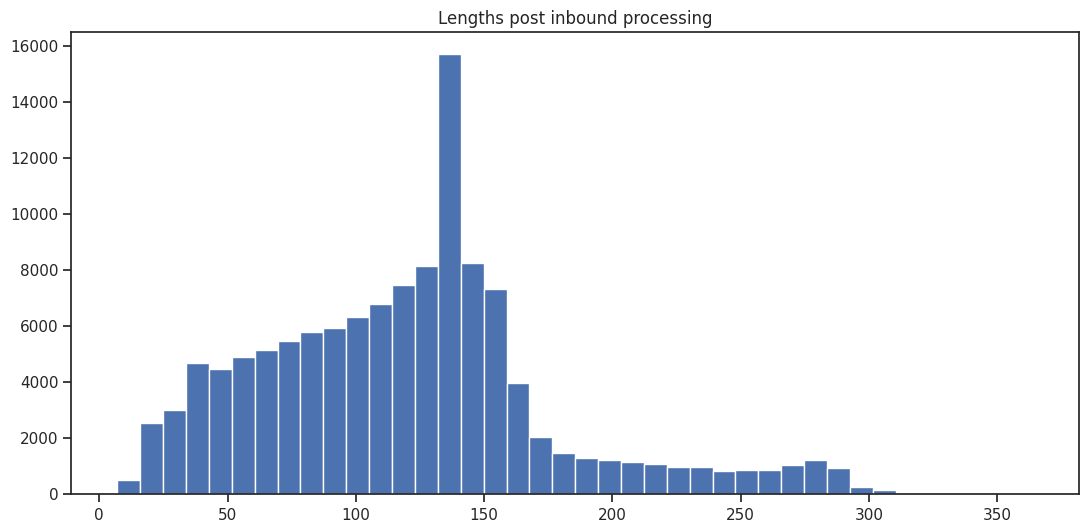

In [32]:
amazon_data = amazon_data[amazon_data["inbound_lang"]=="en"]
# Visualize data lengths after first pass 
visualize_lengths(list(amazon_data["inbound_text"]), "Lengths post inbound processing")


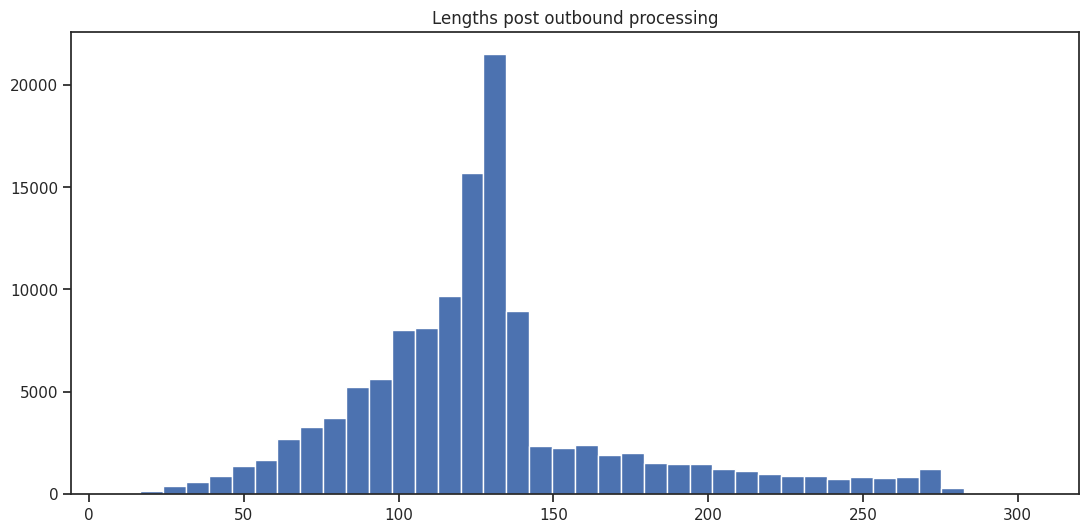

In [45]:
visualize_lengths(list(amazon_data["outbound_text"]), "Lengths post outbound processing")

**Observations**
- Okay, if I filter for any English rows, the follow-up responses besides the given "inbound_text" and "outbound_text" will also be in English 
- After the process, I only have 122340 rows left

In [33]:
amazon_data["inbound_hashtags"] = amazon_data["inbound_text"].progress_apply(extract_hashtags)
amazon_data["outbound_hashtags"] = amazon_data["outbound_text"].progress_apply(extract_hashtags)

my bar!!!: 100%|██████████| 122340/122340 [00:00<00:00, 253370.20it/s]


In [56]:
# Apply the clean function 
amazon_data["clean_inbound_text"] = amazon_data["inbound_text"].progress_apply(clean_text)
amazon_data["clean_outbound_text"] = amazon_data["outbound_text"].progress_apply(clean_text)

my bar!!!: 100%|██████████| 122340/122340 [00:42<00:00, 2857.34it/s]


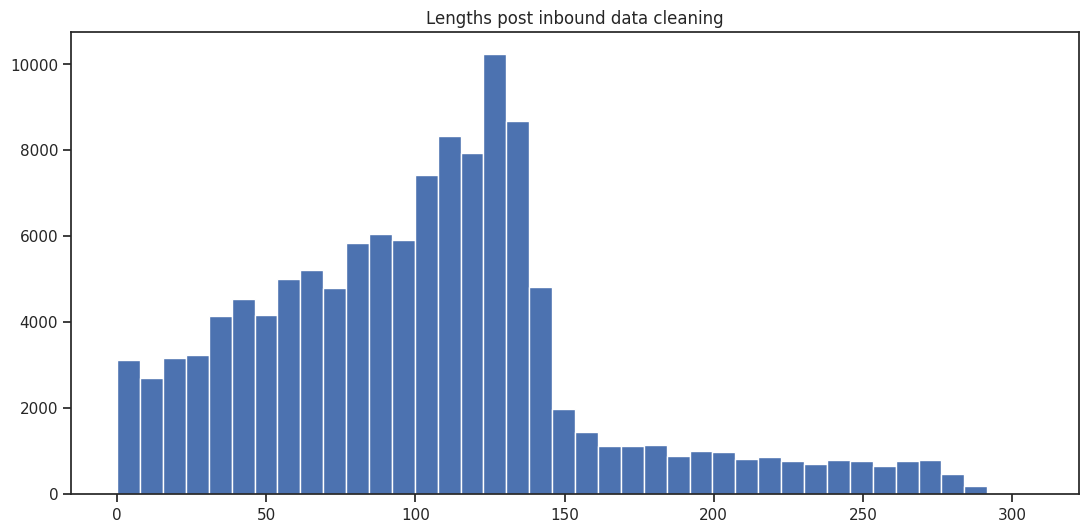

In [52]:
# Visualizing data lengths after second pass 
visualize_lengths(list(amazon_data["clean_inbound_text"]), "Lengths post inbound data cleaning")

In [88]:
!python -m spacy download en_core_web_md

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_md-2.3.1/en_core_web_md-2.3.1.tar.gz#egg=en_core_web_md==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Using cached en_core_web_md-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [90]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download WordNet if you haven't already
nltk.download('wordnet')
nltk.download('punkt')

# Sample sentence
sentence = "The cats are playing in the garden and swimming in the pool."

# Tokenize the sentence into words
tokens = word_tokenize(sentence)

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize each tokenized word
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

print("Original words:", tokens)
print("Lemmatized words:", lemmatized_words)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/root/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

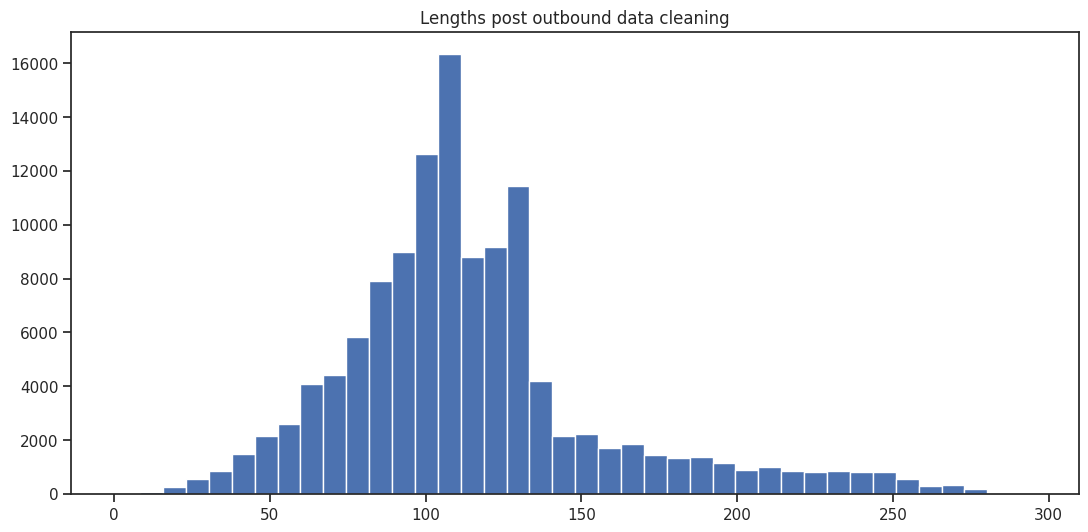

In [53]:
visualize_lengths(list(amazon_data["clean_outbound_text"]), "Lengths post outbound data cleaning")

**Observations** 
- We can clearly observe that post applying the data clean function, the comments lengths have decreased and the distributions has skewed towards right a bit more 
- The lengths of outbound texts are skewed towards both directions, and seem to be rather frequent in the length range of 50-150 

In [46]:
# Lemmatized tokens 
amazon_data["inbound_tokens_pos"] = amazon_data["clean_inbound_text"].progress_apply(lemmatize_and_pos)

my bar!!!: 100%|██████████| 122340/122340 [30:03<00:00, 67.82it/s]


In [37]:
amazon_data

,inbound_text,author_id,created_at,outbound_text,response_tweet_id,inbound_lang,inbound_hashtags,outbound_hashtags,clean_inbound_text,clean_outbound_text,outbound_tokens_pos,inbound_tokens_pos
4,@AmazonHelp 3 different people have given 3 di...,AmazonHelp,2017-10-31 23:28:00+00:00,@115820 We'd like to take a further look into ...,619,en,[],[],different people have given different answers ...,wed like to take a further look into this with...,"[-PRON-: NOUN, d: VERB, like: VERB, to: NOUN, ...",NaN
5,Way to drop the ball on customer service @1158...,AmazonHelp,2017-10-31 22:29:00+00:00,@115820 I'm sorry we've let you down! Without ...,616,en,[],[],way to drop the ball on customer service so pi...,i am sorry we have let you down without provid...,"[i: NOUN, be: NOUN, sorry: NOUN, -PRON-: NOUN,...",NaN
6,@115823 I want my amazon payments account CLOS...,AmazonHelp,2017-10-31 22:28:34+00:00,@115822 I am unable to affect your account via...,NaN,en,[],[],i want my amazon payments account closed dm me...,i am unable to affect your account via twitter...,"[i: NOUN, be: NOUN, unable: NOUN, to: NOUN, af...",NaN
9,@AmazonHelp @115826 Yeah this is crazy we’re l...,AmazonHelp,2017-11-01 12:53:34+00:00,@115827 Thanks for your patience. ^KM,NaN,en,[],[],yeah this is crazy were less than a week away ...,thanks for your patience km,"[thank: NOUN, for: NOUN, -PRON-: NOUN, patienc...",NaN
10,@115828 How about you guys figure out my Xbox ...,AmazonHelp,2017-10-31 22:28:00+00:00,@115826 I'm sorry for the wait. You'll receive...,627,en,[],[],how about you guys figure out my xbox one x pr...,i am sorry for the wait you will receive an em...,"[i: NOUN, be: NOUN, sorry: NOUN, for: NOUN, th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
168803,@AmazonHelp I sent you guys a DM regarding the...,AmazonHelp,2017-11-22 00:17:00+00:00,@328597 We're unable to access customer accoun...,NaN,en,[],[],i sent you guys a dm regarding the status of m...,were unable to access customer accounts via so...,"[be: NOUN, unable: NOUN, to: NOUN, access: VER...",NaN
168805,This is happening in my area w/@115821 “Prime”...,AmazonHelp,2017-11-22 02:16:55+00:00,"@777901 I'm sorry for the delay, Brenda! We st...",2987557,en,[],[],this is happening in my area w prime deliverie...,i am sorry for the delay brenda we strive to s...,"[i: NOUN, be: NOUN, sorry: NOUN, for: NOUN, th...",NaN
168807,@132994 @132995 @115850 got my #OnePlus5T at 8...,AmazonHelp,2017-11-22 03:49:29+00:00,@823783 Woohoo! That's awesome! Hope you love ...,2987674,en,"[#AmazonPrime, #OnePlus5T]",[],got my at am thanks for fulfilling the order fast,woohoo that is awesome hope you love the phone js,"[woohoo: NOUN, that: NOUN, be: NOUN, awesome: ...",NaN
168812,@115850 @132994 No exchange available for #One...,AmazonHelp,2017-11-22 05:22:31+00:00,@823802 The Exchange Offer is currently availa...,NaN,en,[#OnePlus5T],[],no exchange available for i need to exchange m...,the exchange offer is currently available only...,"[the: NOUN, exchange: NOUN, offer: NOUN, be: N...",NaN


In [43]:
amazon_data["clean_inbound_text"][4]

'different people have given different answers and i still do not have my order says delivered saturday was not i was home all day'

In [ ]:
visualize_lengths(list(amazon_data["clean_outbound_text"]), "Lengths post outbound data cleaning")

In [42]:
lemmatize_and_pos(amazon_data["clean_inbound_text"][4])

{'different': 'NOUN',
 'people': 'NOUN',
 'have': 'NOUN',
 'give': 'VERB',
 'answer': 'NOUN',
 'and': 'NOUN',
 'i': 'NOUN',
 'still': 'NOUN',
 'do': 'NOUN',
 'not': 'NOUN',
 '-PRON-': 'NOUN',
 'order': 'NOUN',
 'say': 'VERB',
 'deliver': 'VERB',
 'saturday': 'NOUN',
 'be': 'NOUN',
 'home': 'NOUN',
 'all': 'NOUN',
 'day': 'NOUN'}

In [49]:
# Lemmatized tokens 
# amazon_data = amazon_data.rename(columns={"inbound_tokens_pos": "outbound_tokens_pos"})
amazon_data["outbound_tokens_pos"] = amazon_data["clean_outbound_text"].progress_apply(lemmatize_and_pos)

my bar!!!: 100%|██████████| 122340/122340 [30:25<00:00, 67.04it/s]


In [118]:
amazon_data["inbound_tokens_pos"]

4         [-PRON-: NOUN, d: VERB, like: VERB, to: NOUN, ...
5         [i: NOUN, be: NOUN, sorry: NOUN, -PRON-: NOUN,...
6         [i: NOUN, be: NOUN, unable: NOUN, to: NOUN, af...
9         [thank: NOUN, for: NOUN, -PRON-: NOUN, patienc...
10        [i: NOUN, be: NOUN, sorry: NOUN, for: NOUN, th...
                                ...                        
168803    [be: NOUN, unable: NOUN, to: NOUN, access: VER...
168805    [i: NOUN, be: NOUN, sorry: NOUN, for: NOUN, th...
168807    [woohoo: NOUN, that: NOUN, be: NOUN, awesome: ...
168812    [the: NOUN, exchange: NOUN, offer: NOUN, be: N...
168817    [-PRON-: NOUN, do: NOUN, not: NOUN, have: NOUN...
Name: inbound_tokens_pos, Length: 122340, dtype: object

In [58]:
# Tokenization and Lemmatization 
amazon_data["inbound_text"]

4         @AmazonHelp 3 different people have given 3 di...
5         Way to drop the ball on customer service @1158...
6         @115823 I want my amazon payments account CLOS...
9         @AmazonHelp @115826 Yeah this is crazy we’re l...
10        @115828 How about you guys figure out my Xbox ...
                                ...                        
168803    @AmazonHelp I sent you guys a DM regarding the...
168805    This is happening in my area w/@115821 “Prime”...
168807    @132994 @132995 @115850 got my #OnePlus5T at 8...
168812    @115850 @132994 No exchange available for #One...
168817    @115850  there should be bonus and gifts for r...
Name: inbound_text, Length: 122340, dtype: string

In [125]:
amazon_data.to_csv("/kaggle/working/processed_v2.csv")

In [38]:
from spellchecker import SpellChecker

In [53]:
# Saving all my results
with open('proceesed_v2.pkl', 'wb') as handle:
    pickle.dump(amazon_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [55]:
amazon_data = pd.read_pickle("/kaggle/working/proceesed_v2.pkl")
amazon_data

,inbound_text,author_id,created_at,outbound_text,response_tweet_id,inbound_lang,inbound_hashtags,outbound_hashtags,clean_inbound_text,clean_outbound_text,outbound_tokens_pos,inbound_tokens_pos
4,@AmazonHelp 3 different people have given 3 di...,AmazonHelp,2017-10-31 23:28:00+00:00,@115820 We'd like to take a further look into ...,619,en,[],[],different people have given different answers ...,wed like to take a further look into this with...,"{'-PRON-': 'NOUN', 'd': 'VERB', 'like': 'VERB'...","{'different': 'NOUN', 'people': 'NOUN', 'have'..."
5,Way to drop the ball on customer service @1158...,AmazonHelp,2017-10-31 22:29:00+00:00,@115820 I'm sorry we've let you down! Without ...,616,en,[],[],way to drop the ball on customer service so pi...,i am sorry we have let you down without provid...,"{'i': 'NOUN', 'be': 'NOUN', 'sorry': 'NOUN', '...","{'way': 'NOUN', 'to': 'NOUN', 'drop': 'VERB', ..."
6,@115823 I want my amazon payments account CLOS...,AmazonHelp,2017-10-31 22:28:34+00:00,@115822 I am unable to affect your account via...,NaN,en,[],[],i want my amazon payments account closed dm me...,i am unable to affect your account via twitter...,"{'i': 'NOUN', 'be': 'NOUN', 'unable': 'NOUN', ...","{'i': 'NOUN', 'want': 'VERB', '-PRON-': 'NOUN'..."
9,@AmazonHelp @115826 Yeah this is crazy we’re l...,AmazonHelp,2017-11-01 12:53:34+00:00,@115827 Thanks for your patience. ^KM,NaN,en,[],[],yeah this is crazy were less than a week away ...,thanks for your patience km,"{'thank': 'NOUN', 'for': 'NOUN', '-PRON-': 'NO...","{'yeah': 'NOUN', 'this': 'NOUN', 'be': 'NOUN',..."
10,@115828 How about you guys figure out my Xbox ...,AmazonHelp,2017-10-31 22:28:00+00:00,@115826 I'm sorry for the wait. You'll receive...,627,en,[],[],how about you guys figure out my xbox one x pr...,i am sorry for the wait you will receive an em...,"{'i': 'NOUN', 'be': 'NOUN', 'sorry': 'NOUN', '...","{'how': 'NOUN', 'about': 'NOUN', '-PRON-': 'NO..."
...,...,...,...,...,...,...,...,...,...,...,...,...
168803,@AmazonHelp I sent you guys a DM regarding the...,AmazonHelp,2017-11-22 00:17:00+00:00,@328597 We're unable to access customer accoun...,NaN,en,[],[],i sent you guys a dm regarding the status of m...,were unable to access customer accounts via so...,"{'be': 'NOUN', 'unable': 'NOUN', 'to': 'NOUN',...","{'i': 'NOUN', 'send': 'VERB', '-PRON-': 'NOUN'..."
168805,This is happening in my area w/@115821 “Prime”...,AmazonHelp,2017-11-22 02:16:55+00:00,"@777901 I'm sorry for the delay, Brenda! We st...",2987557,en,[],[],this is happening in my area w prime deliverie...,i am sorry for the delay brenda we strive to s...,"{'i': 'NOUN', 'be': 'NOUN', 'sorry': 'NOUN', '...","{'this': 'NOUN', 'be': 'NOUN', 'happen': 'VERB..."
168807,@132994 @132995 @115850 got my #OnePlus5T at 8...,AmazonHelp,2017-11-22 03:49:29+00:00,@823783 Woohoo! That's awesome! Hope you love ...,2987674,en,"[#AmazonPrime, #OnePlus5T]",[],got my at am thanks for fulfilling the order fast,woohoo that is awesome hope you love the phone js,"{'woohoo': 'NOUN', 'that': 'NOUN', 'be': 'NOUN...","{'get': 'VERB', '-PRON-': 'NOUN', 'at': 'NOUN'..."
168812,@115850 @132994 No exchange available for #One...,AmazonHelp,2017-11-22 05:22:31+00:00,@823802 The Exchange Offer is currently availa...,NaN,en,[#OnePlus5T],[],no exchange available for i need to exchange m...,the exchange offer is currently available only...,"{'the': 'NOUN', 'exchange': 'NOUN', 'offer': '...","{'no': 'NOUN', 'exchange': 'VERB', 'available'..."


In [ ]:
amazon_data.head()

In [29]:
processed_data = pd.read_pickle("/kaggle/input/working-data/proceesed_v1.pkl")
processed_data.head()

,inbound_text,author_id,created_at,outbound_text,response_tweet_id,inbound_lang,inbound_hashtags,outbound_hashtags
4,@AmazonHelp 3 different people have given 3 di...,AmazonHelp,2017-10-31 23:28:00+00:00,@115820 We'd like to take a further look into ...,619,en,[],[]
5,Way to drop the ball on customer service @1158...,AmazonHelp,2017-10-31 22:29:00+00:00,@115820 I'm sorry we've let you down! Without ...,616,en,[],[]
6,@115823 I want my amazon payments account CLOS...,AmazonHelp,2017-10-31 22:28:34+00:00,@115822 I am unable to affect your account via...,NaN,en,[],[]
9,@AmazonHelp @115826 Yeah this is crazy we’re l...,AmazonHelp,2017-11-01 12:53:34+00:00,@115827 Thanks for your patience. ^KM,NaN,en,[],[]
10,@115828 How about you guys figure out my Xbox ...,AmazonHelp,2017-10-31 22:28:00+00:00,@115826 I'm sorry for the wait. You'll receive...,627,en,[],[]


In [56]:
amazon_data = amazon_data.reset_index().drop(["index"], axis=1)

In [57]:
amazon_data

,inbound_text,author_id,created_at,outbound_text,response_tweet_id,inbound_lang,inbound_hashtags,outbound_hashtags,clean_inbound_text,clean_outbound_text,outbound_tokens_pos,inbound_tokens_pos
0,@AmazonHelp 3 different people have given 3 di...,AmazonHelp,2017-10-31 23:28:00+00:00,@115820 We'd like to take a further look into ...,619,en,[],[],different people have given different answers ...,wed like to take a further look into this with...,"{'-PRON-': 'NOUN', 'd': 'VERB', 'like': 'VERB'...","{'different': 'NOUN', 'people': 'NOUN', 'have'..."
1,Way to drop the ball on customer service @1158...,AmazonHelp,2017-10-31 22:29:00+00:00,@115820 I'm sorry we've let you down! Without ...,616,en,[],[],way to drop the ball on customer service so pi...,i am sorry we have let you down without provid...,"{'i': 'NOUN', 'be': 'NOUN', 'sorry': 'NOUN', '...","{'way': 'NOUN', 'to': 'NOUN', 'drop': 'VERB', ..."
2,@115823 I want my amazon payments account CLOS...,AmazonHelp,2017-10-31 22:28:34+00:00,@115822 I am unable to affect your account via...,NaN,en,[],[],i want my amazon payments account closed dm me...,i am unable to affect your account via twitter...,"{'i': 'NOUN', 'be': 'NOUN', 'unable': 'NOUN', ...","{'i': 'NOUN', 'want': 'VERB', '-PRON-': 'NOUN'..."
3,@AmazonHelp @115826 Yeah this is crazy we’re l...,AmazonHelp,2017-11-01 12:53:34+00:00,@115827 Thanks for your patience. ^KM,NaN,en,[],[],yeah this is crazy were less than a week away ...,thanks for your patience km,"{'thank': 'NOUN', 'for': 'NOUN', '-PRON-': 'NO...","{'yeah': 'NOUN', 'this': 'NOUN', 'be': 'NOUN',..."
4,@115828 How about you guys figure out my Xbox ...,AmazonHelp,2017-10-31 22:28:00+00:00,@115826 I'm sorry for the wait. You'll receive...,627,en,[],[],how about you guys figure out my xbox one x pr...,i am sorry for the wait you will receive an em...,"{'i': 'NOUN', 'be': 'NOUN', 'sorry': 'NOUN', '...","{'how': 'NOUN', 'about': 'NOUN', '-PRON-': 'NO..."
...,...,...,...,...,...,...,...,...,...,...,...,...
122335,@AmazonHelp I sent you guys a DM regarding the...,AmazonHelp,2017-11-22 00:17:00+00:00,@328597 We're unable to access customer accoun...,NaN,en,[],[],i sent you guys a dm regarding the status of m...,were unable to access customer accounts via so...,"{'be': 'NOUN', 'unable': 'NOUN', 'to': 'NOUN',...","{'i': 'NOUN', 'send': 'VERB', '-PRON-': 'NOUN'..."
122336,This is happening in my area w/@115821 “Prime”...,AmazonHelp,2017-11-22 02:16:55+00:00,"@777901 I'm sorry for the delay, Brenda! We st...",2987557,en,[],[],this is happening in my area w prime deliverie...,i am sorry for the delay brenda we strive to s...,"{'i': 'NOUN', 'be': 'NOUN', 'sorry': 'NOUN', '...","{'this': 'NOUN', 'be': 'NOUN', 'happen': 'VERB..."
122337,@132994 @132995 @115850 got my #OnePlus5T at 8...,AmazonHelp,2017-11-22 03:49:29+00:00,@823783 Woohoo! That's awesome! Hope you love ...,2987674,en,"[#AmazonPrime, #OnePlus5T]",[],got my at am thanks for fulfilling the order fast,woohoo that is awesome hope you love the phone js,"{'woohoo': 'NOUN', 'that': 'NOUN', 'be': 'NOUN...","{'get': 'VERB', '-PRON-': 'NOUN', 'at': 'NOUN'..."
122338,@115850 @132994 No exchange available for #One...,AmazonHelp,2017-11-22 05:22:31+00:00,@823802 The Exchange Offer is currently availa...,NaN,en,[#OnePlus5T],[],no exchange available for i need to exchange m...,the exchange offer is currently available only...,"{'the': 'NOUN', 'exchange': 'NOUN', 'offer': '...","{'no': 'NOUN', 'exchange': 'VERB', 'available'..."


## Unit Testing for preprocessing pipeline 

# Length of Words 
# 